In [35]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [36]:
# Define State
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [37]:
def calculate_bmi(state: BMIState) -> dict:
    bmi = state["weight_kg"] / (state["height_m"] ** 2)
    return {"bmi": round(bmi, 2)}


In [38]:
def label_bmi(state: BMIState) -> dict:
    bmi = state["bmi"]

    if bmi < 18.5:
        category = "Underweight"
    elif bmi < 25:
        category = "Normal weight"
    elif bmi < 30:
        category = "Overweight"
    else:
        category = "Obese"

    return {"category": category}


In [39]:
#define your graph
graph = StateGraph(BMIState)
#add nodes in your graph
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("lable_bmi",lable_bmi)
#add edges in your graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi","lable_bmi")
graph.add_edge("lable_bmi", END)
#compile the graph
workflow = graph.compile()





In [41]:
#execute the graph
initial_state = {
    "weight_kg": 90,
    "height_m": 1.73,
    "bmi": 0,
    "category": ""
}

final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 90, 'height_m': 1.73, 'bmi': 30.07, 'category': 'Obese'}


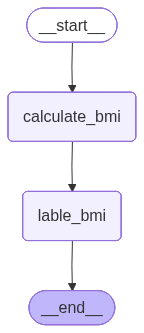

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())